                median       max      min     range           std
SalePrice     163000.0  755000.0  34900.0  720100.0  79442.502883
OverallQual        6.0      10.0      1.0       9.0      1.382997
1stFlrSF        1087.0    4692.0    334.0    4358.0    386.587738
TotRmsAbvGrd       6.0      14.0      2.0      12.0      1.625393
YearBuilt       1973.0    2010.0   1872.0     138.0     30.202904
LotFrontage       69.0     313.0     21.0     292.0     24.284752


C:\Users\mdonis\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


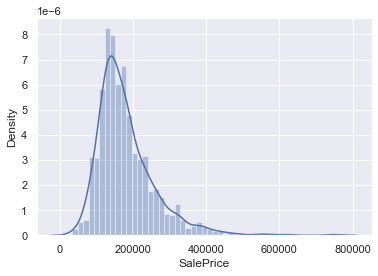

C:\Users\mdonis\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


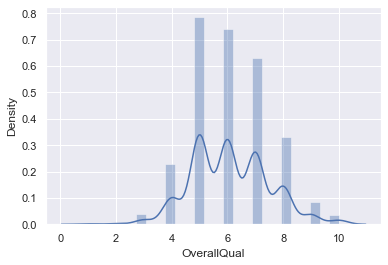

C:\Users\mdonis\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


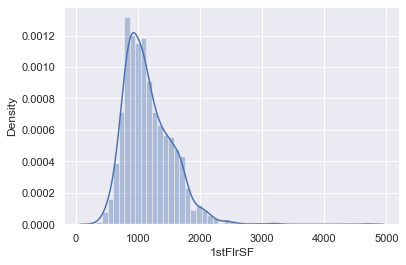

C:\Users\mdonis\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


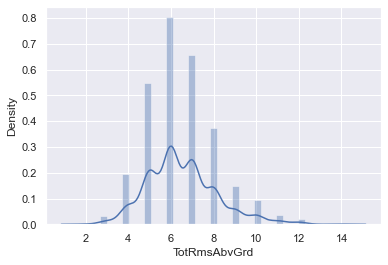

C:\Users\mdonis\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


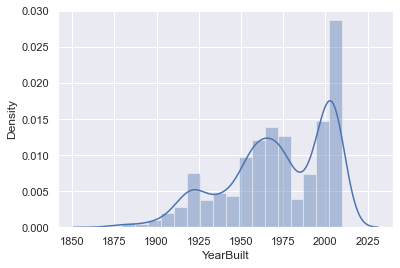

C:\Users\mdonis\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


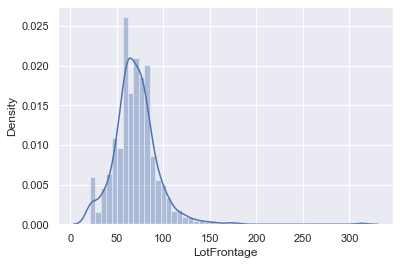

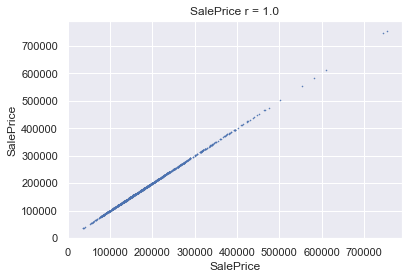

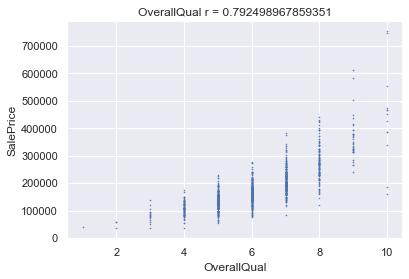

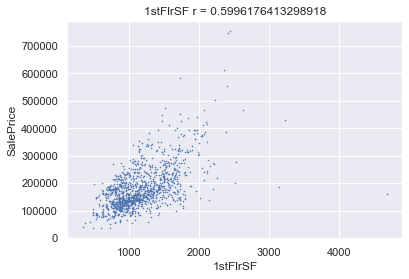

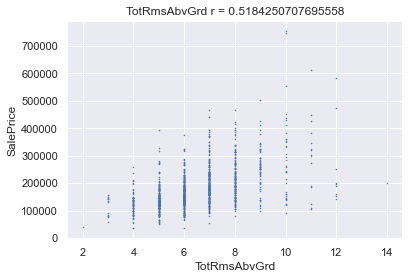

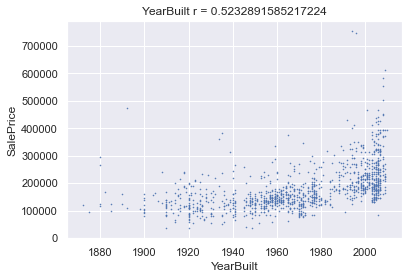

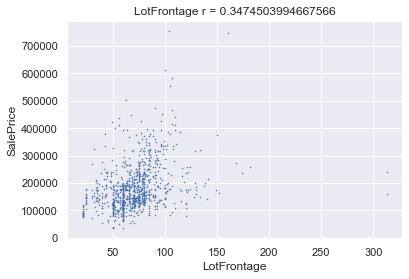

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Descarga
ds = np.load('proyecto_training_data.npy')

# Mismos sets de datos convertidos en dataframes
varss = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
df = pd.DataFrame(ds, columns = varss)

# Relación columnas ds-df
d = {'SalePrice':0,'OverallQual':1,'1stFlrSF':2,'TotRmsAbvGrd':3,'YearBuilt':4,'LotFrontage':5}

#%% 2. Random-Slicing:
# Random
np.random.shuffle(ds)

# Slicing 80%-20%
s = int(ds.shape[0]*0.8)

train = ds[0:s,:]
test = ds[s:,:]

# Análogos en dfs
train_df = pd.DataFrame(train, columns = varss)
test_df = pd.DataFrame(test, columns = varss)

#%% 3. Análisis Exploratorio:
# Análisis exploratorio pandas
med = df.median(axis = 0)
maxx = df.max(axis = 0)
minn = df.min(axis = 0)
rang = maxx - minn
std = df.std(axis = 0)


# Resultado análisis exploratorio
exp_analysis = pd.concat([med,maxx,minn,rang,std], keys = ['median','max','min','range','std'], axis = 1)
print(exp_analysis)

#%% 4. histogramas
h = {}
sns.set_theme();

for i in df.columns:
    h['{}'.format(i)] = sns.distplot(df['{}'.format(i)])
    plt.show()
    

#%% 5. Para cada variable independiente x:
    
# Correlación vectorizada
r = {}
p = {}
for i in d:
    if np.isnan(train[:,d[i]].sum()) == False:
        y = train[:,0]
        x = train[:,d[i]]
        n = y.shape[0]
    else:
        train_nonna = train[~np.isnan(train).any(axis=1)]
        y = train_nonna[:,0]
        x = train_nonna[:,d[i]]
        n = y.shape[0]
        
    r['{}'.format(i)] = (n*(x*y).sum() - x.sum()*y.sum()) / ((n*(x**2).sum() - x.sum()**2)*(n*(y**2).sum() - y.sum()**2))**(1/2)
    
    # scatterplot
    p['{}'.format(i)] = plt.scatter(x, y, s = 0.3)
    plt.title('{} r = {}'.format(varss[d[i]],r[i]))
    plt.xlabel(varss[d[i]])
    plt.ylabel(varss[0])
    plt.show()
    

#%% 6 y 7. Función de entrenamiento para el modelo de regresión lineal


y = train[:,d['SalePrice']].reshape(-1, 1)
x = train[:,d['OverallQual']].reshape(-1, 1)
b = np.ones_like(x)
mat_a = np.hstack([x,b])
b1, b0 = 2, 1
vect = np.array([[b1],[b0]])
epochs = 10
imprimir_error_cada = 1
learning_rate = 3
n = y.shape[0]

# iteraciones
y_h = np.matmul(mat_a, vect)

e = (1/(2*n))*((y-y_h)**2).sum()
    

In [3]:
r

{'SalePrice': 1.0,
 'OverallQual': 0.792498967859351,
 '1stFlrSF': 0.5996176413298918,
 'TotRmsAbvGrd': 0.5184250707695558,
 'YearBuilt': 0.5232891585217224,
 'LotFrontage': 0.3474503994667566}

In [40]:
hists

{'SalePrice': <AxesSubplot:xlabel='SalePrice', ylabel='Density'>,
 'OverallQual': <AxesSubplot:xlabel='OverallQual', ylabel='Density'>,
 '1stFlrSF': <AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>,
 'TotRmsAbvGrd': <AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Density'>,
 'YearBuilt': <AxesSubplot:xlabel='YearBuilt', ylabel='Density'>,
 'LotFrontage': <AxesSubplot:xlabel='LotFrontage', ylabel='Density'>}